In [4]:
import os
import numpy as np
from base import *

In [5]:
pth = r'\\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\human liver'
pthim = os.path.join(pth, '10x')
umpix = 1
pthtest = os.path.join(pth, 'testing image')
pthtestim = os.path.join(pthtest, '10x')
nm = 'loop_models_weightedloss_sametiles12_03_2024'
resolution = '10x'

WS = [[0, 0, 0, 0, 0, 0, 2], [7, 6], 
      [1, 2, 3, 4, 5, 6, 7], 
      [4, 6, 2, 3, 5, 1, 7], []]

numclass = max(WS[2])
sxy = 1024
pthDL = os.path.join(pth, nm)
nblack = numclass + 1
nwhite = WS[1][0]
cmap = np.array([[230, 190, 100],
                  [65, 155, 210],
                  [145, 35, 35],
                  [158, 24, 118],
                  [30, 50, 50],
                  [235, 188, 215],
                  [255, 255, 255]])
classNames = ['PDAC', 'bile duct', 'vasculature', 'hepatocyte','immune','stroma','whitespace']
classCheck = []
ntrain = 15
nvalidate = np.ceil(ntrain/5)
nTA = 2

______________UNet_______________
Saving model metadata and classification colormap...
Max WS[2]: 7
Classnames: ['PDAC', 'bile duct', 'vasculature', 'hepatocyte', 'immune', 'stroma', 'whitespace']
Net file already exists, updating data...
Physical devices cannot be modified after being initialized


2025-02-12 13:19:34 - INFO - 
System Resources:
2025-02-12 13:19:34 - INFO - CPU Usage: 36.4%
2025-02-12 13:19:34 - INFO - System Memory: 147.1GB / 255.3GB (57.6%)
2025-02-12 13:19:34 - INFO - Process Memory: 8324.4MB
2025-02-12 13:19:34 - INFO - 
GPU Information:
2025-02-12 13:19:34 - INFO - 
Device: GPU 0
2025-02-12 13:19:34 - INFO - Name: NVIDIA RTX 5000 Ada Generation
2025-02-12 13:19:34 - INFO - Memory: 31596.0MB / 32760.0MB
2025-02-12 13:19:34 - INFO - Utilization: 2.0%
2025-02-12 13:20:31 - INFO - 
Initial Validation Dataset Information:
2025-02-12 13:20:31 - INFO - 
Initial-Validation Dataset Information:
2025-02-12 13:20:31 - INFO - Image batch shape: (3, 1024, 1024, 3)
2025-02-12 13:20:31 - INFO - Mask batch shape: (3, 1024, 1024, 1)
2025-02-12 13:20:32 - INFO - Class distribution in sample batch:
2025-02-12 13:20:32 - INFO -   Class 7: 1393672 pixels (44.30%)
2025-02-12 13:20:32 - INFO -   Class 4: 62599 pixels (1.99%)
2025-02-12 13:20:32 - INFO -   Class 3: 510313 pixels (1

Starting model training...
Epoch 1/5
500/500 [==============================] - 316s 593ms/step - loss: 0.8734 - accuracy: 0.8650 - val_loss: 0.9056 - val_accuracy: 0.8197
Epoch 2/5
500/500 [==============================] - 282s 563ms/step - loss: 0.8046 - accuracy: 0.9190 - val_loss: 0.8192 - val_accuracy: 0.8938
Epoch 3/5
500/500 [==============================] - 289s 577ms/step - loss: 0.7855 - accuracy: 0.9355 - val_loss: 0.7839 - val_accuracy: 0.9437
Epoch 4/5
500/500 [==============================] - 277s 554ms/step - loss: 0.7791 - accuracy: 0.9423 - val_loss: 0.7842 - val_accuracy: 0.9364
Epoch 5/5
500/500 [==============================] - 278s 555ms/step - loss: 0.7737 - accuracy: 0.9500 - val_loss: 0.7754 - val_accuracy: 0.9531
Epoch 6/10
500/500 [==============================] - 290s 570ms/step - loss: 0.7691 - accuracy: 0.9574 - val_loss: 0.7725 - val_accuracy: 0.9600
Epoch 7/10
500/500 [==============================] - 275s 550ms/step - loss: 0.7674 - accuracy: 0.960

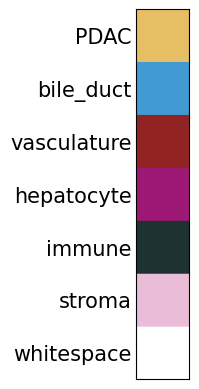

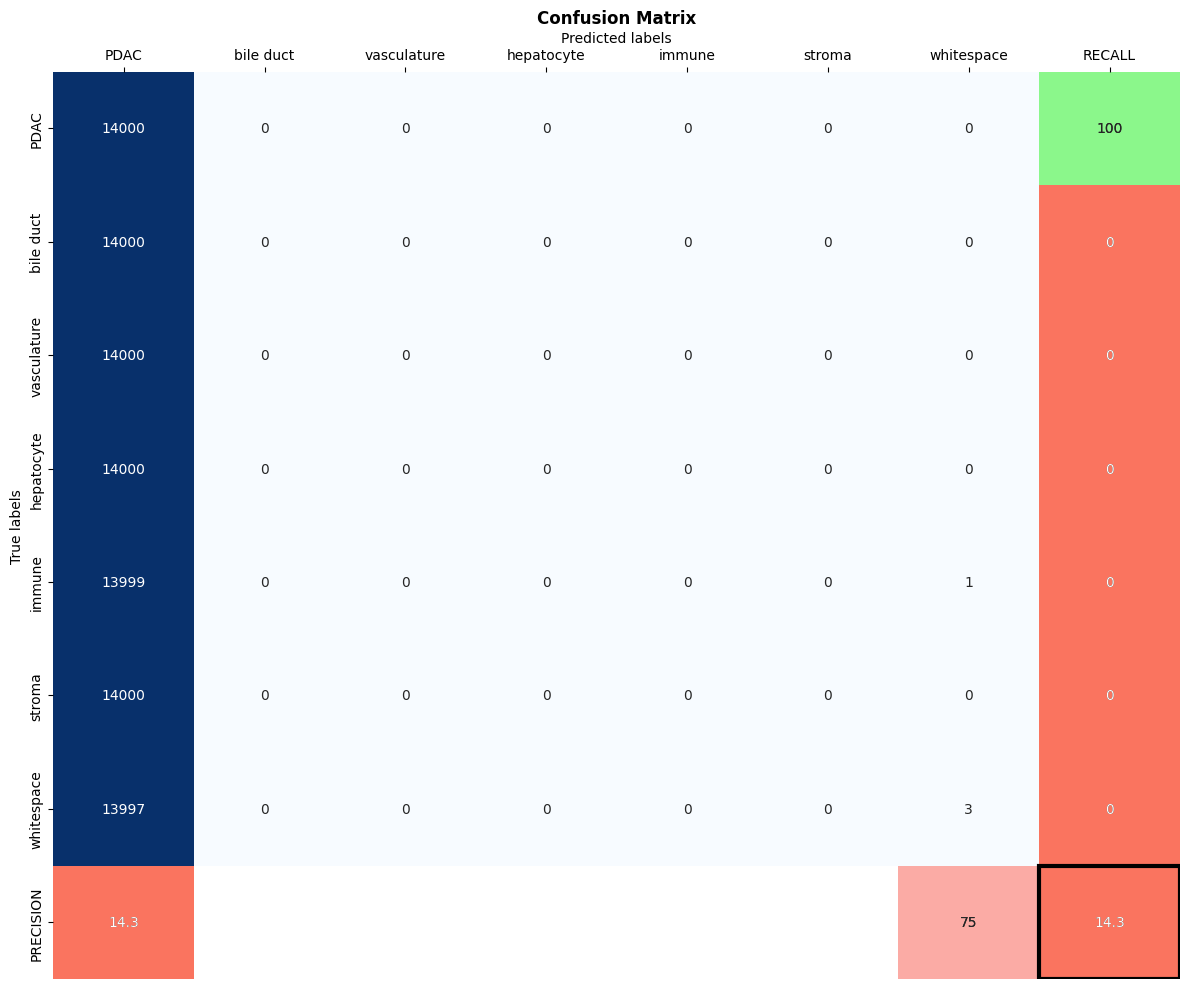


Confusion matrix saved to \\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\human liver\loop_models_weightedloss_sametiles12_03_2024\confusion_matrixUNet.jpg

Overall Accuracy: 14.3%
__________________________________________


In [6]:
CNNs = ["UNet"]

#Train test and classify an image for each CNN
for cnn_name in CNNs:
    print(f'______________{cnn_name}_______________')
    save_model_metadata_GUI(pthDL, pthim,pthtest, WS, nm, umpix, cmap, sxy, classNames, ntrain, nvalidate, nTA = 3,final_df = None, combined_df = None, model_type=cnn_name, batch_size=3)
    train_segmentation_model_cnns(pthDL)
    test_segmentation_model(pthDL,pthtest, pthtestim, cnn_name)
    # classify_images(pthim,pthDL, cnn_name)
    print(f'__________________________________________')